In [77]:
import numpy as np
import pandas as pd

In [78]:
df = pd.read_excel('spam.xlsx')

In [79]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [80]:
df.shape

(5572, 5)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [82]:
# Drop the unwanted columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True) 

In [83]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  

In [85]:
df['v1'] = le.fit_transform(df['v1'])

In [86]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [87]:
# missing values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [88]:
# check for duplicate values
df.duplicated().sum()

403

In [89]:
# drop duplicates
df = df.drop_duplicates(keep='first')

In [90]:
df.duplicated().sum()

0

In [91]:
df.shape

(5169, 2)

In [92]:
df['v1'].value_counts()

0    4516
1     653
Name: v1, dtype: int64

([<matplotlib.patches.Wedge at 0x13daadf5a50>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'Not Spam'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.367'),
  Text(0.5533635081542612, -0.23192418555038377, '12.633')])

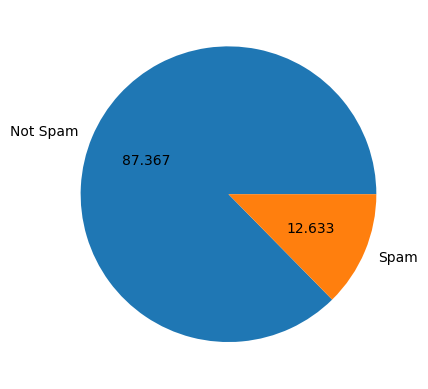

In [93]:
from matplotlib import pyplot as plt
plt.pie(df['v1'].value_counts(),labels=['Not Spam','Spam'],autopct='%0.3f')

In [94]:
df['character_numbers'] = df['v2'].str.len()

In [95]:
df.head()

,v1,v2,character_numbers
0,0,"Go until jurong point, crazy.. Available only ...",111.0
1,0,Ok lar... Joking wif u oni...,29.0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155.0
3,0,U dun say so early hor... U c already then say...,49.0
4,0,"Nah I don't think he goes to usf, he lives aro...",61.0


In [96]:
df['number of words'] = df['v2'].apply(lambda x:len(str(x).split(' ')))

In [97]:
df.head()

,v1,v2,character_numbers,number of words
0,0,"Go until jurong point, crazy.. Available only ...",111.0,20
1,0,Ok lar... Joking wif u oni...,29.0,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,28
3,0,U dun say so early hor... U c already then say...,49.0,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61.0,13


In [98]:
df[['character_numbers','number of words']].describe()

,character_numbers,number of words
count,5168.000000,5169.000000
mean,78.994969,15.455988
std,58.235445,11.163853
min,2.000000,1.000000
25%,36.000000,7.000000
50%,60.000000,12.000000
75%,117.000000,22.000000
max,910.000000,171.000000


In [99]:
# not spam
df[df['v1'] == 0][['character_numbers','number of words']].describe()

,character_numbers,number of words
count,4515.000000,4516.000000
mean,70.476855,14.259743
std,56.359585,11.231781
min,2.000000,1.000000
25%,34.000000,7.000000
50%,52.000000,11.000000
75%,90.000000,19.000000
max,910.000000,171.000000


In [100]:
# spam
df[df['v1'] == 1][['character_numbers','number of words']].describe()

,character_numbers,number of words
count,653.000000,653.000000
mean,137.891271,23.728943
std,30.137753,5.985799
min,13.000000,2.000000
25%,132.000000,22.000000
50%,149.000000,25.000000
75%,157.000000,28.000000
max,224.000000,35.000000


(0.0, 700.0)

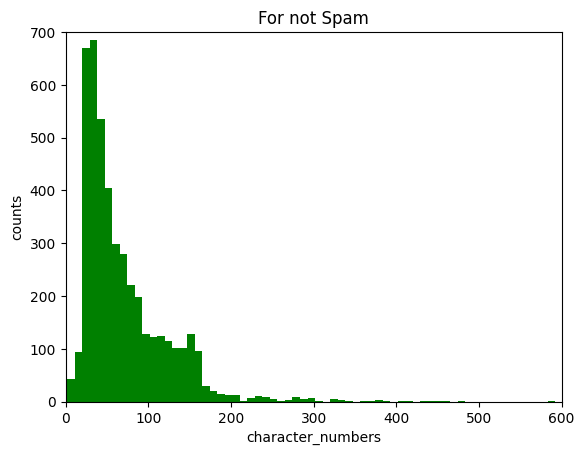

In [101]:
plt.hist(df[df['v1'] == 0]['character_numbers'],bins=100,color='green')
plt.xlabel('character_numbers')
plt.ylabel('counts')
plt.title('For not Spam')
plt.xlim(0, 600)  # Set x-axis range
plt.ylim(0, 700)  # Set y-axis range

(0.0, 700.0)

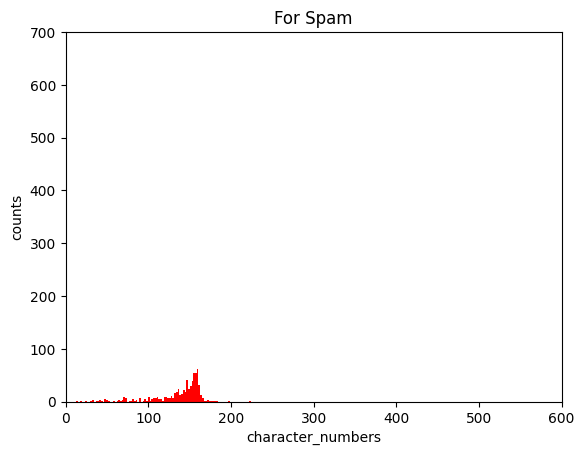

In [102]:
plt.hist(df[df['v1'] == 1]['character_numbers'],bins=100,color='red')
plt.xlabel('character_numbers')
plt.ylabel('counts')
plt.title('For Spam')
plt.xlim(0, 600)  # Set x-axis range
plt.ylim(0, 700)  # Set y-axis range

(0.0, 600.0)

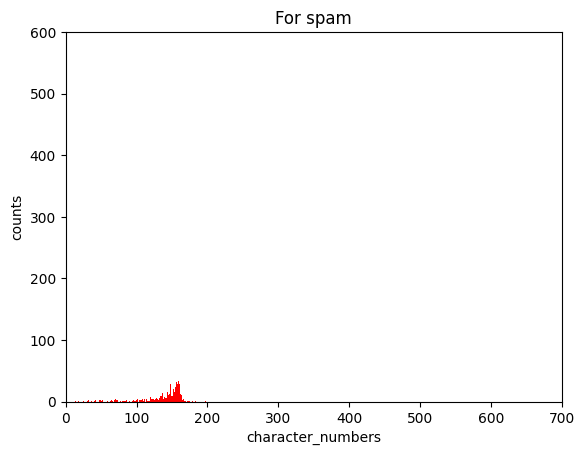

In [103]:
plt.hist(df[df['v1'] == 1]['character_numbers'],bins=200,color='red')
plt.xlabel('character_numbers')
plt.ylabel('counts')
plt.title('For spam')
plt.xlim(0, 700)  # Set x-axis range
plt.ylim(0, 600)  # Set y-axis range

(0.0, 600.0)

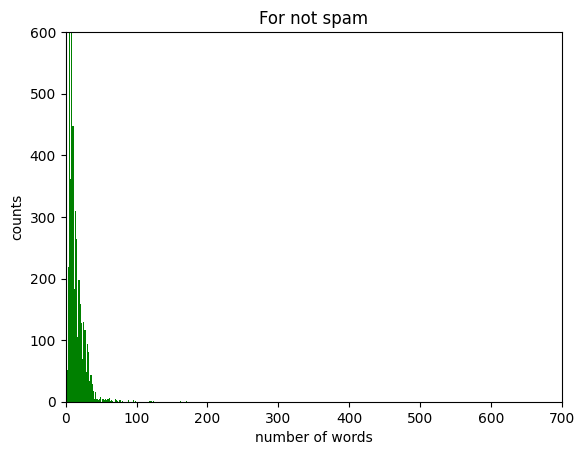

In [104]:
plt.hist(df[df['v1'] == 0]['number of words'],bins=100,color='green')
plt.xlabel('number of words')
plt.ylabel('counts')
plt.title('For not spam')
plt.xlim(0, 700)  # Set x-axis range
plt.ylim(0, 600)  # Set y-axis range

(0.0, 600.0)

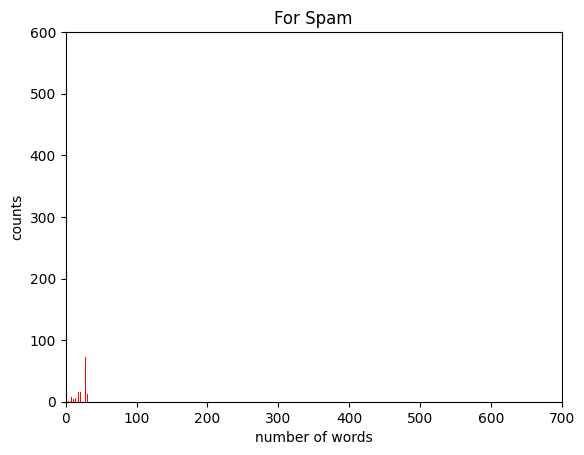

In [105]:
plt.hist(df[df['v1'] == 1]['number of words'],bins=100,color='red')
plt.xlabel('number of words')
plt.ylabel('counts')
plt.title('For Spam')
plt.xlim(0, 700)  # Set x-axis range
plt.ylim(0, 600)  # Set y-axis range

In [106]:
import seaborn as sb

<AxesSubplot: xlabel='character_numbers', ylabel='Count'>

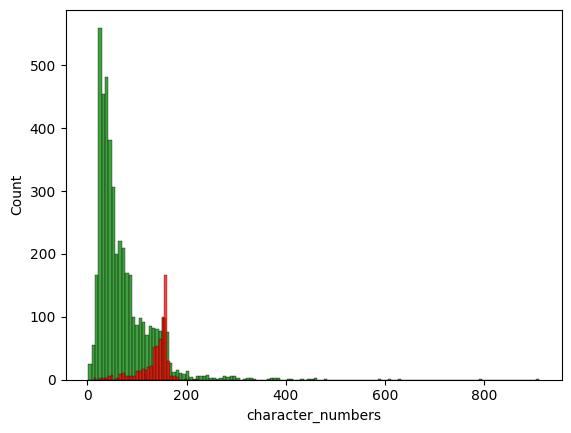

In [107]:
sb.histplot(df[df['v1'] == 0]['character_numbers'],color='green')
sb.histplot(df[df['v1'] == 1]['character_numbers'],color='red')

<AxesSubplot: xlabel='number of words', ylabel='Count'>

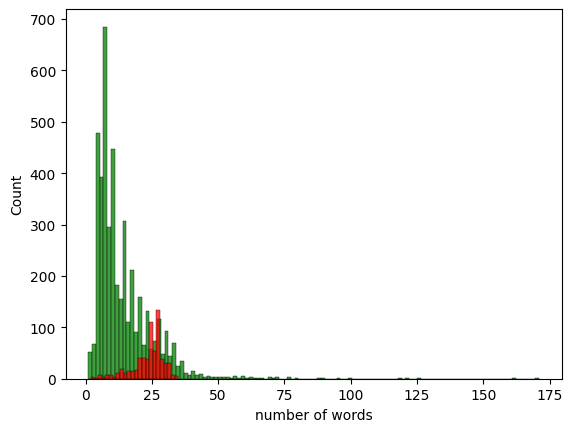

In [108]:
sb.histplot(df[df['v1'] == 0]['number of words'],color='green')
sb.histplot(df[df['v1'] == 1]['number of words'],color='red')

In [109]:
df.head()

,v1,v2,character_numbers,number of words
0,0,"Go until jurong point, crazy.. Available only ...",111.0,20
1,0,Ok lar... Joking wif u oni...,29.0,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,28
3,0,U dun say so early hor... U c already then say...,49.0,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61.0,13


In [110]:
df.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6688\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,v1,character_numbers,number of words
v1,1.000000,0.384654,0.281818
character_numbers,0.384654,1.000000,0.974223
number of words,0.281818,0.974223,1.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_6688\3264164387.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(),annot=True)


<AxesSubplot: >

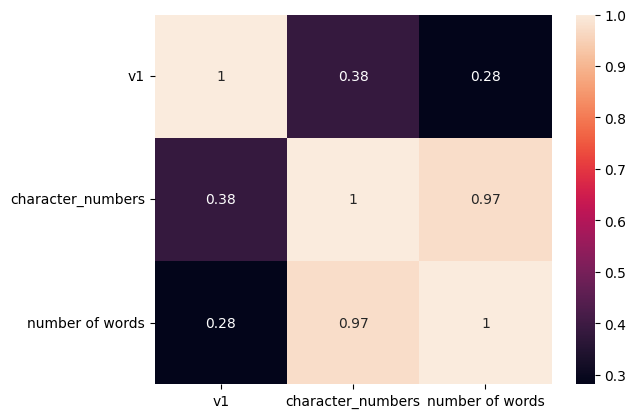

In [111]:
sb.heatmap(df.corr(),annot=True)

In [112]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [113]:
from nltk.stem.porter import PorterStemmer
ps  = PorterStemmer()
ps.stem('pretty')

'pretti'

In [114]:
def transformText(text):
    text = text.lower()
    text = word_tokenize(text)

    words = []
    for word in text:
        if word.isalnum():   # return true if all the characters are alphanumeric
            words.append(word)

    text = words[:]
    words.clear()

    for word in text:
        if word not in stopwords.words('english'):
            words.append(word)

    text = words[:]
    words.clear()

    for word in text:
        words.append(ps.stem(word))

    

    return " ".join(words)

In [115]:
import spacy
nlp = spacy.load("en_core_web_md")
doc = nlp("hello my freind you like my work? u are beautifull running congrats congratulation eat ate")
for token in doc:
    print(token,"|",token.lemma_)

hello | hello
my | my
freind | freind
you | you
like | like
my | my
work | work
? | ?
u | u
are | be
beautifull | beautifull
running | running
congrats | congrat
congratulation | congratulation
eat | eat
ate | eat


In [116]:
transformText('hello ate liking your? u are beautiful running congrats congratulation')

'hello ate like u beauti run congrat congratul'

In [117]:
df['v2'] = df['v2'].apply(str)

In [118]:
df['v2'] = df['v2'].apply(transformText)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   v1                 5169 non-null   int32  
 1   v2                 5169 non-null   object 
 2   character_numbers  5168 non-null   float64
 3   number of words    5169 non-null   int64  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 181.7+ KB


In [120]:
df

,v1,v2,character_numbers,number of words
0,0,go jurong point crazi avail bugi n great world...,111.0,20
1,0,ok lar joke wif u oni,29.0,6
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155.0,28
3,0,u dun say earli hor u c alreadi say,49.0,11
4,0,nah think goe usf live around though,61.0,13
...,...,...,...,...
5567,1,2nd time tri 2 contact u pound prize 2 claim e...,161.0,30
5568,0,b go esplanad fr home,37.0,8
5569,0,piti mood suggest,57.0,10
5570,0,guy bitch act like interest buy someth els nex...,125.0,26


In [121]:
spamMSG = []
for msg in df[df['v1'] == 1]['v2'].tolist():
    for word in msg.split():
        spamMSG.append(word)

In [122]:
len(spamMSG)

9939

In [123]:
not_spamMSG = []
for msg in df[df['v1'] == 0]['v2'].tolist():
    for word in msg.split():
        not_spamMSG.append(word)

In [124]:
len(not_spamMSG)

35392

__Model Building__

In [125]:
Y = df['v1'].values

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from  sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [128]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=3000)

In [130]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer()


In [131]:
X2 = tv.fit_transform(df['v2']).toarray()


In [132]:
X2.shape

(5169, 3000)

In [133]:
x_trains,x_tests,y_trains,y_tests = train_test_split(X2,Y,test_size=0.4,random_state=2)

In [134]:
gnb.fit(x_trains,y_trains)
y_predicts1 = gnb.predict(x_tests)
print(accuracy_score(y_tests,y_predicts1))
print(confusion_matrix(y_tests,y_predicts1))
print(precision_score(y_tests,y_predicts1))

0.8747582205029013
[[1610  204]
 [  55  199]]
0.49379652605459057


In [135]:
mnb.fit(x_trains,y_trains)
y_predicts2 = mnb.predict(x_tests)
print(accuracy_score(y_tests,y_predicts2))
print(confusion_matrix(y_tests,y_predicts2))
print(precision_score(y_tests,y_predicts2))

0.9705029013539652
[[1814    0]
 [  61  193]]
1.0


In [136]:
bnb.fit(x_trains,y_trains)
y_predicts3 = bnb.predict(x_tests)
print(accuracy_score(y_tests,y_predicts3))
print(confusion_matrix(y_tests,y_predicts3))
print(precision_score(y_tests,y_predicts3))

0.9782398452611218
[[1812    2]
 [  43  211]]
0.9906103286384976


In [137]:
import pickle
pickle.dump(tv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))